In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer, OrdinalEncoder, FunctionTransformer

In [4]:
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.pipeline import Pipeline, make_pipeline

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

# Still need to try:
 - multi-class
- CAT boost + SHAP
- SHAP
- FastAI tabular learner + embeddings visualiser
- ROC curves with cross-val (done?
- Get worse predictions out of cross-val (done? )
- Learning curves?
- EDA histograms with positive and negative classes (DONE)
- Complex imputation (i.e. by multi factors or KNN style)

- Creating repeatable pipeline to build multiple model versions


In [6]:
np.log1p(np.NaN)

nan

In [7]:
fetch_openml?

Signature:
fetch_openml(
    name: Optional[str] = None,
    *,
    version: Union[str, int] = 'active',
    data_id: Optional[int] = None,
    data_home: Union[str, os.PathLike, NoneType] = None,
    target_column: Union[str, List, NoneType] = 'default-target',
    cache: bool = True,
    return_X_y: bool = False,
    as_frame: Union[str, bool] = 'auto',
    n_retries: int = 3,
    delay: float = 1.0,
    parser: str = 'warn',
    read_csv_kwargs: Optional[Dict] = None,
)
Docstring:
Fetch dataset from openml by name or dataset id.

Datasets are uniquely identified by either an integer ID or by a
combination of name and version (i.e. there might be multiple
versions of the 'iris' dataset). Please give either name or data_id
(not both). In case a name is given, a version can also be
provided.

Read more in the :ref:`User Guide <openml>`.

.. versionadded:: 0.20

.. note:: EXPERIMENTAL

    The API is experimental (particularly the return value structure),
    and might have small backwa

In [8]:
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)

/home/prash/.pyenv/versions/3.9.9/envs/classicml/lib/python3.9/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [9]:
# Drop features indicating target variable
X.drop(['boat', 'body'], axis=1, inplace=True)

In [10]:
X.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'home.dest'],
      dtype='object')

In [11]:
X.shape

(1309, 11)

In [12]:
y.iloc[933]

'0'

In [13]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: category
Categories (2, object): ['0', '1']

In [14]:
X.describe()

,pclass,age,sibsp,parch,fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479
std,0.837836,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


In [15]:
X.describe(include='all')

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
count,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,745
unique,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,369
top,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,"New York, NY"
freq,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,64
mean,2.294882,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN
std,0.837836,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN
min,1.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN
50%,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN
75%,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, shuffle=True, random_state=42)


In [17]:
X_train.shape

(981, 11)

In [18]:
X_train.head(20)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
1216,3.0,"Smyth, Miss. Julia",female,NaN,0.0,0.0,335432,7.7333,NaN,Q,NaN
819,3.0,"Glynn, Miss. Mary Agatha",female,NaN,0.0,0.0,335677,7.7500,NaN,Q,"Co Clare, Ireland Washington, DC"
1286,3.0,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0.0,0.0,2688,7.2292,NaN,C,NaN
1280,3.0,"Vovk, Mr. Janko",male,22.0,0.0,0.0,349252,7.8958,NaN,S,NaN
761,3.0,"de Pelsmaeker, Mr. Alfons",male,16.0,0.0,0.0,345778,9.5000,NaN,S,NaN
746,3.0,"Daly, Mr. Eugene Patrick",male,29.0,0.0,0.0,382651,7.7500,NaN,Q,"Co Athlone, Ireland New York, NY"
1297,3.0,"Wiseman, Mr. Phillippe",male,NaN,0.0,0.0,A/4. 34244,7.2500,NaN,S,NaN
25,1.0,"Birnbaum, Mr. Jakob",male,25.0,0.0,0.0,13905,26.0000,NaN,C,"San Francisco, CA"
750,3.0,"Danoff, Mr. Yoto",male,27.0,0.0,0.0,349219,7.8958,NaN,S,"Bulgaria Chicago, IL"
642,3.0,"Asplund, Master. Filip Oscar",male,13.0,4.0,2.0,347077,31.3875,NaN,S,"Sweden Worcester, MA"


In [19]:
len(X_train[(y_train == '0') & (X_train.cabin.isnull())]) / len(X_train[(y_train == '0')])

0.8795379537953796

In [20]:
len(X_train[(y_train == '1') & (X_train.cabin.isnull())]) / len(X_train[(y_train == '1')])

0.6293333333333333

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 1216 to 2
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     981 non-null    float64 
 1   name       981 non-null    object  
 2   sex        981 non-null    category
 3   age        782 non-null    float64 
 4   sibsp      981 non-null    float64 
 5   parch      981 non-null    float64 
 6   ticket     981 non-null    object  
 7   fare       980 non-null    float64 
 8   cabin      212 non-null    object  
 9   embarked   981 non-null    category
 10  home.dest  567 non-null    object  
dtypes: category(2), float64(5), object(4)
memory usage: 78.8+ KB


In [22]:
# Weird we have a null fare
X_train[X_train.fare.isnull()]
# check ticket

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
1225,3.0,"Storey, Mr. Thomas",male,60.5,0.0,0.0,3701,NaN,NaN,S,NaN


In [23]:
X_train[X_train.ticket == '3701']


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
1225,3.0,"Storey, Mr. Thomas",male,60.5,0.0,0.0,3701,NaN,NaN,S,NaN


# Explore Cabin type

In [24]:
X_train[X_train.cabin.notnull()]['cabin'].str[0].value_counts()

cabin
C    69
B    47
D    38
E    29
A    16
F     9
G     3
T     1
Name: count, dtype: int64

In [25]:
X_train

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
1216,3.0,"Smyth, Miss. Julia",female,NaN,0.0,0.0,335432,7.7333,NaN,Q,NaN
819,3.0,"Glynn, Miss. Mary Agatha",female,NaN,0.0,0.0,335677,7.7500,NaN,Q,"Co Clare, Ireland Washington, DC"
1286,3.0,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0.0,0.0,2688,7.2292,NaN,C,NaN
1280,3.0,"Vovk, Mr. Janko",male,22.0,0.0,0.0,349252,7.8958,NaN,S,NaN
761,3.0,"de Pelsmaeker, Mr. Alfons",male,16.0,0.0,0.0,345778,9.5000,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...
872,3.0,"Howard, Miss. May Elizabeth",female,NaN,0.0,0.0,A. 2. 39186,8.0500,NaN,S,NaN
777,3.0,"Dorking, Mr. Edward Arthur",male,19.0,0.0,0.0,A/5. 10482,8.0500,NaN,S,"England Oglesby, IL"
423,2.0,"Gillespie, Mr. William Henry",male,34.0,0.0,0.0,12233,13.0000,NaN,S,"Vancouver, BC"
668,3.0,"Barton, Mr. David John",male,22.0,0.0,0.0,324669,8.0500,NaN,S,"England New York, NY"


In [26]:
X_train[X_train.fare > 200.0]

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
237,1.0,"Robbins, Mr. Victor",male,NaN,0.0,0.0,PC 17757,227.5250,NaN,C,NaN
49,1.0,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0.0,1.0,PC 17755,512.3292,B51 B53 B55,C,"Austria-Hungary / Germantown, Philadelphia, PA"
114,1.0,"Fortune, Mr. Charles Alexander",male,19.0,3.0,2.0,19950,263.0000,C23 C25 C27,S,"Winnipeg, MB"
129,1.0,"Geiger, Miss. Amalie",female,35.0,0.0,0.0,113503,211.5000,C130,C,NaN
35,1.0,"Bowen, Miss. Grace Scott",female,45.0,0.0,0.0,PC 17608,262.3750,NaN,C,"Cooperstown, NY"
314,1.0,"Widener, Mrs. George Dunton (Eleanor Elkins)",female,50.0,1.0,1.0,113503,211.5000,C80,C,"Elkins Park, PA"
173,1.0,"Keeping, Mr. Edwin",male,32.5,0.0,0.0,113503,211.5000,C132,C,NaN
24,1.0,"Bird, Miss. Ellen",female,29.0,0.0,0.0,PC 17483,221.7792,C97,S,NaN
313,1.0,"Widener, Mr. Harry Elkins",male,27.0,0.0,2.0,113503,211.5000,C82,C,"Elkins Park, PA"
312,1.0,"Widener, Mr. George Dunton",male,50.0,1.0,1.0,113503,211.5000,C80,C,"Elkins Park, PA"


In [27]:
# could also do str[0]
X_train['name'].str.split(',').str.get(0).value_counts()

name
Andersson       10
Asplund          8
Sage             6
Carter           6
Goodwin          6
                ..
Andersen         1
Richard          1
Strom            1
van Billiard     1
Barton           1
Name: count, Length: 713, dtype: int64

In [28]:
X_train.dtypes

pclass        float64
name           object
sex          category
age           float64
sibsp         float64
parch         float64
ticket         object
fare          float64
cabin          object
embarked     category
home.dest      object
dtype: object

# Start Modelling

In [76]:
#feature_cols = ['pclass', 'sex', 'age', 'parch', 'sibsp', 'fare']
feature_cols = ['pclass', 'sex', 'age', 'parch', 'sibsp', 'fare', 'cabin', 'embarked']

In [30]:
SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)

SimpleImputer(fill_value=-1, strategy='constant')

In [31]:
np.log1p(0)

0.0

In [32]:
ord_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [33]:
def log_transform(X):
    x_transform = np.log10(X + 1)
    #x_transform = x_transform.nan_to_num(-1)
    return x_transform

In [34]:
def extract_cabin_type(x):
    return x.cabin[x.cabin.notnull()].str[0]
    

In [35]:
X_train.cabin[X_train.cabin.notnull()].str[0]

140    D
133    C
82     B
49     B
201    E
      ..
198    D
91     B
322    C
155    B
2      C
Name: cabin, Length: 212, dtype: object

In [36]:
cabin_transformer = FunctionTransformer(extract_cabin_type, feature_names_out="one-to-one")

In [37]:
cabin_transformer.fit_transform(X_train)

140    D
133    C
82     B
49     B
201    E
      ..
198    D
91     B
322    C
155    B
2      C
Name: cabin, Length: 212, dtype: object

In [38]:
log_preprocessor = Pipeline(
    steps=[
        ("imputation_const", SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=0)),
        ("log_transformer", FunctionTransformer(log_transform, validate=True, feature_names_out="one-to-one")),
    ]
)

In [40]:
cabin_preprocessor = Pipeline(
    steps = [
        ("cabin_extract", FunctionTransformer(extract_cabin_type, feature_names_out="one-to-one")),
        ("cabin_ordinal", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1, encoded_missing_value=-1, min_frequency=5))
    ]
)

In [107]:
#      ('log_tranformer', FunctionTransformer(np.log1p, validate=True, feature_names_out='one-to-one'))

col_transformer = ColumnTransformer([("sex_ordinal", ord_encoder, ["sex"]),
                                     ("embarked_ordinal", ord_encoder, ["embarked"]),
                                     ("fare_log1p", log_preprocessor, ["fare"]),
                                     ("age_imputed", SimpleImputer(missing_values=np.nan, strategy="median"), ["age"]),
                                     ("age_missing", MissingIndicator(), ["age"]),
                                     ("cabin_missing", MissingIndicator(), ["cabin"]),
                                     ("cabin_type", cabin_preprocessor, ["cabin"])
                                    ], remainder='passthrough')

In [108]:
col_transformer.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('sex_ordinal',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['sex']),
                                ('embarked_ordinal',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['embarked']),
                                ('fare_log1p',
                                 Pipeline(steps=[('imputation_const',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 (...
                                ('age_missing', MissingIndicator(), ['age']),
                                ('cabin_missing', MissingIndicator(),
                                 ['cabin']),
                                ('cabin_type',
                                 Pipeline(steps=[('cabin_extract',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function extract_cabin_type at 0x7fa015a17430>)),
                                                 ('cabin_ordinal',
                                                  OrdinalEncoder(encoded_missing_value=-1,
                                                                 handle_unknown='use_encoded_value',
                                                                 min_frequency=5,
                                                                 unknown_value=-1))]),
                                 ['cabin'])])

In [109]:
col_transformer.fit(X_train[feature_cols])

ColumnTransformer(remainder='passthrough',
                  transformers=[('sex_ordinal',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['sex']),
                                ('embarked_ordinal',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['embarked']),
                                ('fare_log1p',
                                 Pipeline(steps=[('imputation_const',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 (...
                                ('age_missing', MissingIndicator(), ['age']),
                                ('cabin_missing', MissingIndicator(),
                                 ['cabin']),
                                ('cabin_type',
                                 Pipeline(steps=[('cabin_extract',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function extract_cabin_type at 0x7fa015a17430>)),
                                                 ('cabin_ordinal',
                                                  OrdinalEncoder(encoded_missing_value=-1,
                                                                 handle_unknown='use_encoded_value',
                                                                 min_frequency=5,
                                                                 unknown_value=-1))]),
                                 ['cabin'])])

In [110]:
col_transformer.get_feature_names_out()

array(['sex_ordinal__sex', 'embarked_ordinal__embarked',
       'fare_log1p__fare', 'age_imputed__age',
       'age_missing__missingindicator_age',
       'cabin_missing__missingindicator_cabin', 'cabin_type__cabin',
       'remainder__pclass', 'remainder__parch', 'remainder__sibsp'],
      dtype=object)

In [111]:
X_train_transform = col_transformer.transform(X_train[feature_cols])

In [112]:
X_train_transform

,sex_ordinal__sex,embarked_ordinal__embarked,fare_log1p__fare,age_imputed__age,age_missing__missingindicator_age,cabin_missing__missingindicator_cabin,cabin_type__cabin,remainder__pclass,remainder__parch,remainder__sibsp
1216,0.0,1.0,0.941178,28.0,True,True,-1.0,3.0,0.0,0.0
819,0.0,1.0,0.942008,28.0,True,True,-1.0,3.0,0.0,0.0
1286,0.0,0.0,0.915358,38.0,False,True,-1.0,3.0,0.0,0.0
1280,1.0,2.0,0.949185,22.0,False,True,-1.0,3.0,0.0,0.0
761,1.0,2.0,1.021189,16.0,False,True,-1.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
872,0.0,2.0,0.956649,28.0,True,True,-1.0,3.0,0.0,0.0
777,1.0,2.0,0.956649,19.0,False,True,-1.0,3.0,0.0,0.0
423,1.0,2.0,1.146128,34.0,False,True,-1.0,2.0,0.0,0.0
668,1.0,2.0,0.956649,22.0,False,True,-1.0,3.0,0.0,0.0


In [113]:
X_train_transform.cabin_type__cabin.value_counts()

cabin_type__cabin
-1.0    769
 2.0     69
 1.0     47
 3.0     38
 4.0     29
 0.0     16
 5.0      9
 6.0      4
Name: count, dtype: int64

In [114]:
X_train_transform.cabin_missing__missingindicator_cabin.value_counts()

cabin_missing__missingindicator_cabin
True     769
False    212
Name: count, dtype: int64

<Axes: >

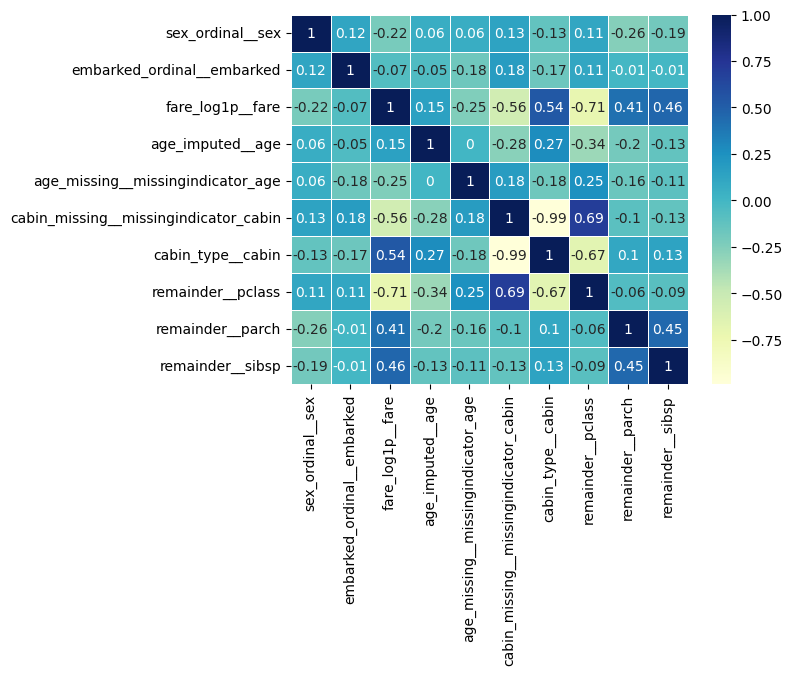

In [139]:
# Why spearman? Check this: https://idkwhoneedstohearthis.blogspot.com/2020/05/correlation-why-spearmans.html
sns.heatmap(X_train_transform.corr(method='spearman').round(2),linewidth = 0.5,annot=True,cmap="YlGnBu")

### Check column transformer doing as I expect

In [49]:
cols_df = pd.DataFrame({'a':[1, 2, None, 4, 5], 'b':['non', 'bob', 'asd', 'd', 'e']})

In [50]:
cols_df

,a,b
0,1.0,non
1,2.0,bob
2,NaN,asd
3,4.0,d
4,5.0,e


In [51]:
test_col_trans = ColumnTransformer(
    [
        ('add10',FunctionTransformer(lambda x: x + 10) ,['a']),
        ('add20',FunctionTransformer(lambda x: x + 20) ,['a'])
        
    ]
    , remainder='passthrough')

In [52]:
test_col_trans.set_output(transform='pandas')

/home/prash/.pyenv/versions/3.9.9/envs/classicml/lib/python3.9/site-packages/sklearn/preprocessing/_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('add10',
                                 FunctionTransformer(func=<function <lambda> at 0x7fa0159601f0>),
                                 ['a']),
                                ('add20',
                                 FunctionTransformer(func=<function <lambda> at 0x7fa015960af0>),
                                 ['a'])])

In [53]:
test_col_trans.fit_transform(cols_df)

,add10__a,add20__a,remainder__b
0,11.0,21.0,non
1,12.0,22.0,bob
2,NaN,NaN,asd
3,14.0,24.0,d
4,15.0,25.0,e


# Cross-validation fitting

In [58]:
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score

In [54]:
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

## What is baseline?
Improving on a dumb classifier requires beating 61.7% accuracy

In [55]:
y_train.value_counts() / len(y_train)

survived
0    0.617737
1    0.382263
Name: count, dtype: float64

In [300]:
X_train_transform.describe()

,sex_ordinal__sex,fare_log1p__fare,age_imputed__age,remainder__pclass,remainder__parch,remainder__sibsp
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,0.648318,1.287174,29.565155,2.299694,0.386340,0.480122
std,0.477739,0.419414,12.952422,0.836593,0.873987,0.989157
min,0.000000,0.000000,0.333300,1.000000,0.000000,0.000000
25%,0.000000,0.949185,22.000000,2.000000,0.000000,0.000000
50%,1.000000,1.176091,28.000000,3.000000,0.000000,0.000000
75%,1.000000,1.508866,35.000000,3.000000,0.000000,1.000000
max,1.000000,2.710396,80.000000,3.000000,9.000000,8.000000


# Version 1 ish

In [182]:

clf = RandomForestClassifier(min_weight_fraction_leaf=0.02, random_state=42)
scores = cross_val_score(clf, X_train_transform.drop(["remainder__age", "fare_log1p__fare"], axis=1), y_train, cv=10)

KeyError: "['remainder__age'] not found in axis"

In [41]:
scores

array([0.84771574, 0.75510204, 0.7755102 , 0.79591837, 0.75      ])

In [209]:
scores.mean(), scores.std()

(0.7889930591525951, 0.010451222738319086)

### Version 2

In [42]:
clf = RandomForestClassifier(min_weight_fraction_leaf=0.02, random_state=42, n_estimators=500)
scores = cross_val_score(clf, X_train_transform.drop(["remainder__age"], axis=1), y_train, cv=10)

In [43]:
scores

array([0.82741117, 0.76530612, 0.78061224, 0.79081633, 0.74489796])

In [44]:
scores.mean(), scores.std()

(0.7818087641147831, 0.02755682034338901)

# Version 3

In [301]:
clf = RandomForestClassifier(min_weight_fraction_leaf=0.02, random_state=42, n_estimators=500)
#scores = cross_val_score(clf, X_train_transform, y_train, cv=10)
cv_results = cross_validate(clf, X_train_transform, y_train, cv=10)

In [302]:
y_pred = cross_val_predict(clf, X_train_transform, y_train, method='predict_proba', cv=10)

In [303]:
cv_results

{'fit_time': array([0.89849353, 0.80467153, 0.86470866, 0.93793535, 0.83452415,
        0.78538394, 0.83312631, 0.83439183, 0.93023205, 0.88687277]),
 'score_time': array([0.04138947, 0.04056096, 0.04050469, 0.04079342, 0.04027462,
        0.04041195, 0.04112935, 0.04460382, 0.0438664 , 0.04043436]),
 'test_score': array([0.80808081, 0.85714286, 0.81632653, 0.75510204, 0.74489796,
        0.80612245, 0.79591837, 0.80612245, 0.71428571, 0.79591837])}

In [304]:
cv_results['test_score'].mean(), cv_results['test_score'].std()

(0.7899917542774686, 0.0388623210691697)

In [305]:
scores.mean(), scores.std()

(0.7899917542774686, 0.0388623210691697)

In [306]:
y_pred[:,1].shape

(981,)

In [208]:
y_train.astype(float) - y_pred[:,0]

1216    0.548052
819     0.513620
1286    0.497164
1280   -0.877348
761    -0.721810
          ...   
872     0.429513
777     0.152607
423    -0.843508
668    -0.897971
2      -0.092251
Name: survived, Length: 981, dtype: float64

In [307]:
y_train_preds = pd.DataFrame({'actual': y_train, 'pred': y_pred[:,1]})

In [308]:
y_train_preds

,actual,pred
1216,1,0.548052
819,1,0.513620
1286,1,0.497164
1280,0,0.122652
761,0,0.278190
...,...,...
872,1,0.429513
777,1,0.152607
423,0,0.156492
668,0,0.102029


<Axes: xlabel='pred', ylabel='Count'>

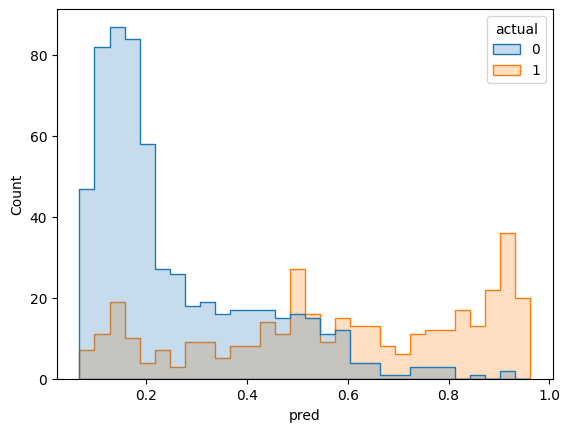

In [340]:
sns.histplot(y_train_preds, x='pred', bins=30, hue='actual', element='step')

In [242]:
X_train[(y_train_preds.pred < 0.4) & (y_train_preds.actual == '1')].describe(include='all')

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,fare_log10
count,92.000000,92,92,72.000000,92.000000,92.000000,92,92.000000,24,92,52,92.000000
unique,NaN,92,2,NaN,NaN,NaN,85,NaN,22,3,43,NaN
top,NaN,"Daly, Mr. Eugene Patrick",male,NaN,NaN,NaN,1601,NaN,E25,S,"New York, NY",NaN
freq,NaN,1,90,NaN,NaN,NaN,5,NaN,2,62,4,NaN
mean,2.336957,NaN,NaN,31.118056,0.347826,0.163043,NaN,23.226765,NaN,NaN,NaN,1.221009
std,0.867954,NaN,NaN,13.683673,0.817861,0.451546,NaN,25.273070,NaN,NaN,NaN,0.363765
min,1.000000,NaN,NaN,3.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,1.000000,NaN,NaN,21.750000,0.000000,0.000000,NaN,7.839600,NaN,NaN,NaN,0.946431
50%,3.000000,NaN,NaN,29.000000,0.000000,0.000000,NaN,11.989600,NaN,NaN,NaN,1.112875
75%,3.000000,NaN,NaN,39.000000,0.000000,0.000000,NaN,29.250000,NaN,NaN,NaN,1.480681


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


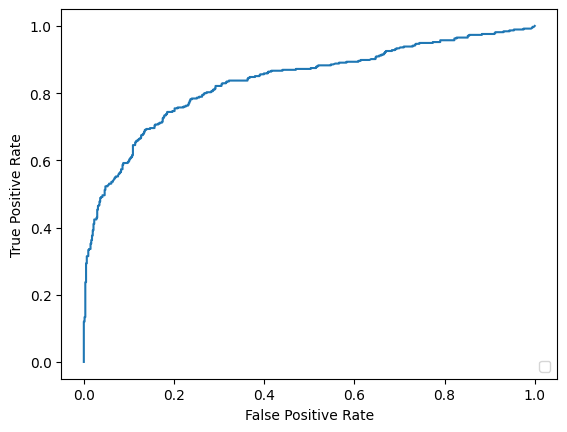

In [311]:
fpr, tpr, _ = roc_curve(y_train_preds.actual, y_train_preds.pred, pos_label='1')
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [333]:
roc_auc_score(y_train_preds.actual, y_train_preds.pred)

0.8358965896589658

# Version 4

In [326]:
X_train_transform

,sex_ordinal__sex,fare_log1p__fare,age_imputed__age,cabin_missing__missingindicator_cabin,remainder__pclass,remainder__parch,remainder__sibsp
1216,0.0,0.941178,28.0,True,3.0,0.0,0.0
819,0.0,0.942008,28.0,True,3.0,0.0,0.0
1286,0.0,0.915358,38.0,True,3.0,0.0,0.0
1280,1.0,0.949185,22.0,True,3.0,0.0,0.0
761,1.0,1.021189,16.0,True,3.0,0.0,0.0
...,...,...,...,...,...,...,...
872,0.0,0.956649,28.0,True,3.0,0.0,0.0
777,1.0,0.956649,19.0,True,3.0,0.0,0.0
423,1.0,1.146128,34.0,True,2.0,0.0,0.0
668,1.0,0.956649,22.0,True,3.0,0.0,0.0


In [328]:
clf = RandomForestClassifier(min_weight_fraction_leaf=0.02, random_state=42, n_estimators=500)
#scores = cross_val_score(clf, X_train_transform, y_train, cv=10)
cv_results = cross_validate(clf, X_train_transform, y_train, cv=10)
y_pred = cross_val_predict(clf, X_train_transform, y_train, method='predict_proba', cv=10)
y_train_preds_v4 = pd.DataFrame({'actual': y_train, 'pred': y_pred[:,1]})


<Axes: xlabel='pred', ylabel='Count'>

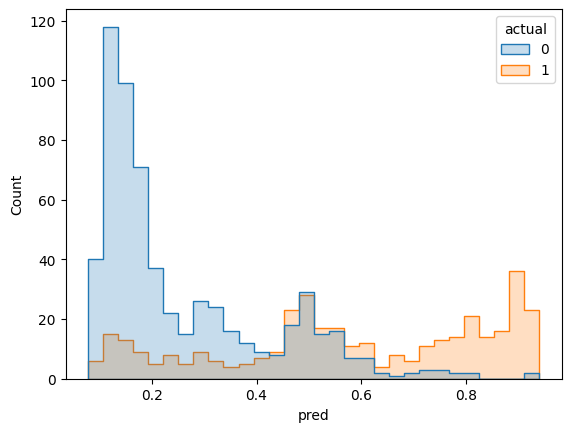

In [339]:
sns.histplot(y_train_preds_v4, x='pred', bins=30, hue='actual', element='step')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


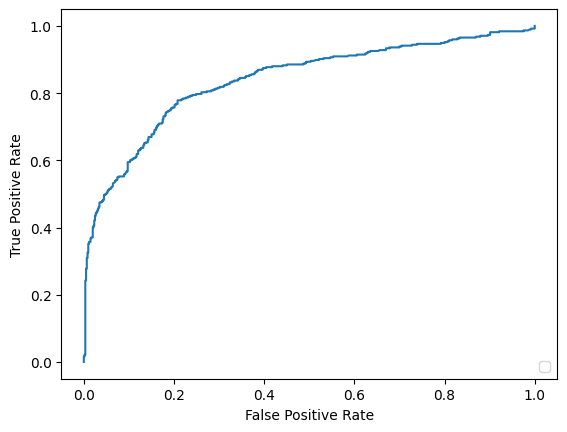

In [330]:
fpr, tpr, _ = roc_curve(y_train_preds_v4.actual, y_train_preds_v4.pred, pos_label='1')
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [346]:
clf = RandomForestClassifier(min_weight_fraction_leaf=0.02, random_state=42, n_estimators=500)
clf.fit(X_train_transform, y_train)
for feat, importance in zip(X_train_transform.columns, clf.feature_importances_):
    print('feature: {f}, importance: {i}'.format(f=feat, i=importance))

feature: sex_ordinal__sex, importance: 0.49807568320828094
feature: fare_log1p__fare, importance: 0.16491938618241797
feature: age_imputed__age, importance: 0.09226133991627453
feature: cabin_missing__missingindicator_cabin, importance: 0.07413471259802036
feature: remainder__pclass, importance: 0.09585333669287649
feature: remainder__parch, importance: 0.03922337816623945
feature: remainder__sibsp, importance: 0.035532163235890236


In [334]:
roc_auc_score(y_train_preds_v4.actual, y_train_preds_v4.pred)

0.8387678767876787

In [209]:
sns.scatterplot(y_train, x='survived', y=y_train.astype(float) - y_pred[:,0])

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

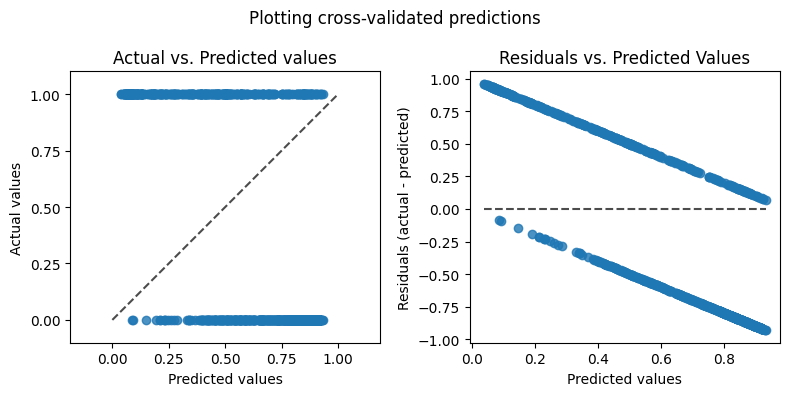

In [212]:
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_train.astype(float),
    y_pred=y_pred[:,0],
    kind="actual_vs_predicted",
    #subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_train.astype(float),
    y_pred=y_pred[:,0],
    kind="residual_vs_predicted",
    #subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

# Version 5

In [115]:
clf = RandomForestClassifier(min_weight_fraction_leaf=0.02, random_state=42, n_estimators=500, class_weight = "balanced")
#scores = cross_val_score(clf, X_train_transform, y_train, cv=10)
cv_results = cross_validate(clf, X_train_transform, y_train, cv=10)
y_pred = cross_val_predict(clf, X_train_transform, y_train, method='predict_proba', cv=10)
y_train_preds_v5 = pd.DataFrame({'actual': y_train, 'pred': y_pred[:,1]})

In [116]:
cv_results['test_score'].mean(), cv_results['test_score'].std()

(0.7879097093382808, 0.043217416328137394)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.8407678767876787

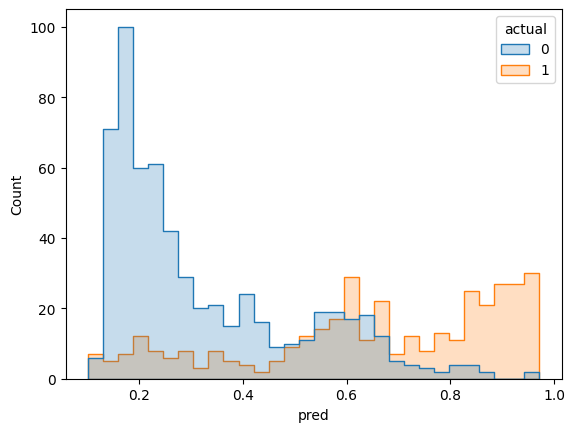

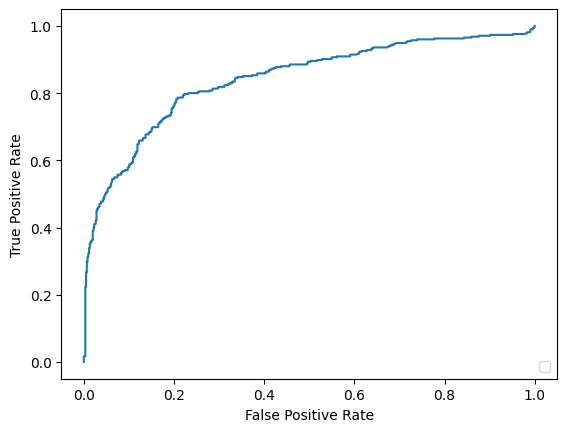

In [117]:
sns.histplot(y_train_preds_v5, x='pred', bins=30, hue='actual', element='step')
fpr, tpr, _ = roc_curve(y_train_preds_v5.actual, y_train_preds_v5.pred, pos_label='1')
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
roc_auc_score(y_train_preds_v5.actual, y_train_preds_v5.pred)

In [131]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       606
           1       0.70      0.77      0.74       375

    accuracy                           0.79       981
   macro avg       0.78      0.79      0.78       981
weighted avg       0.79      0.79      0.79       981



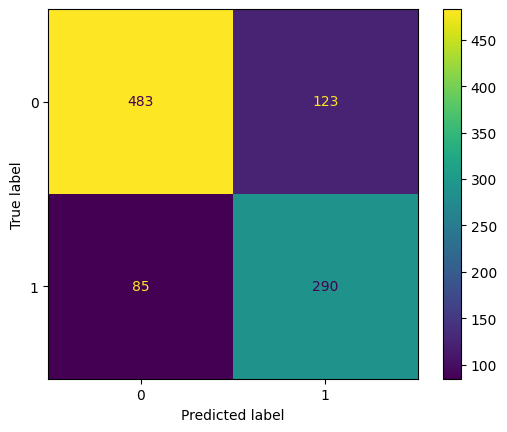

In [132]:
cm = confusion_matrix(y_train_preds_v5.actual.astype(int), y_train_preds_v5.pred > 0.5)
cm_display = ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_train_preds_v5.actual.astype(int), y_train_preds_v5.pred > 0.5))

In [123]:
y_train_preds_v5[(y_train_preds_v5.actual == '1') & (y_train_preds_v5.pred < 0.]

,actual,pred
1216,1,0.636768
819,1,0.622150
1286,1,0.620935
746,1,0.222404
140,1,0.633691
...,...,...
1082,1,0.429905
119,1,0.279313
449,1,0.795765
872,1,0.527871


# SHAP

In [118]:
import shap

In [119]:
clf = RandomForestClassifier(min_weight_fraction_leaf=0.02, random_state=42, n_estimators=500, class_weight = "balanced")
clf.fit(X_train_transform, y_train)

RandomForestClassifier(class_weight='balanced', min_weight_fraction_leaf=0.02,
                       n_estimators=500, random_state=42)

In [120]:
explainer = shap.Explainer(clf)
shap_values = explainer(X_train_transform)


In [69]:
shap_values

.values =
array([[[-0.24686973,  0.24686973],
        [ 0.00588567, -0.00588567],
        [ 0.00728649, -0.00728649],
        ...,
        [ 0.03305733, -0.03305733],
        [ 0.0041967 , -0.0041967 ],
        [-0.01023363,  0.01023363]],

       [[-0.22906754,  0.22906754],
        [ 0.02628297, -0.02628297],
        [ 0.00766975, -0.00766975],
        ...,
        [ 0.03707862, -0.03707862],
        [ 0.00563034, -0.00563034],
        [-0.00917515,  0.00917515]],

       [[-0.24752032,  0.24752032],
        [ 0.02810072, -0.02810072],
        [ 0.03611094, -0.03611094],
        ...,
        [ 0.03779599, -0.03779599],
        [ 0.00575368, -0.00575368],
        [-0.00876065,  0.00876065]],

       ...,

       [[ 0.16384762, -0.16384762],
        [ 0.04308914, -0.04308914],
        [ 0.02532062, -0.02532062],
        ...,
        [-0.00259884,  0.00259884],
        [ 0.02242874, -0.02242874],
        [-0.00305269,  0.00305269]],

       [[ 0.13792766, -0.13792766],
        [ 0.06162

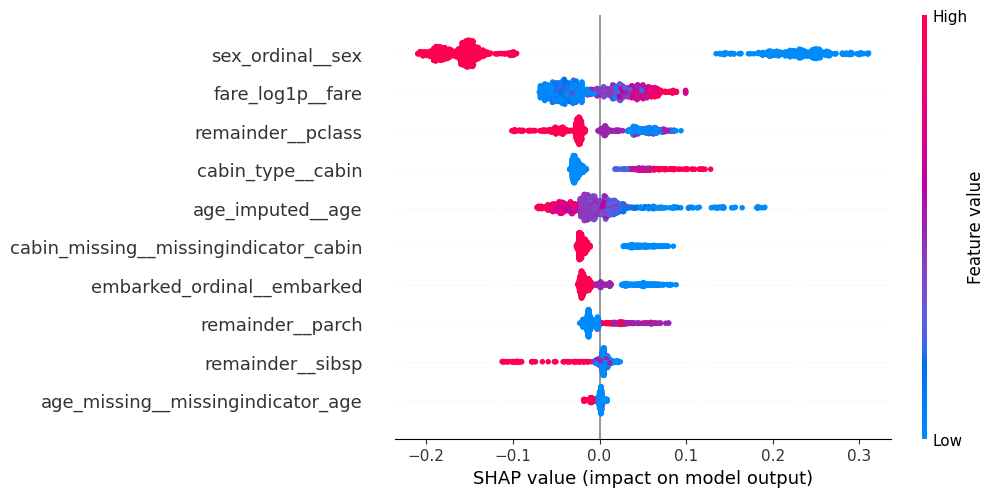

In [121]:
shap.plots.beeswarm(shap_values[:,:,1])


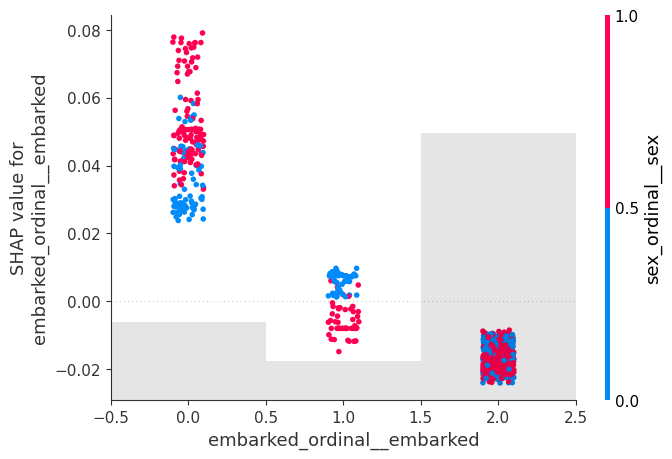

In [91]:
shap.plots.scatter(shap_values[:, "embarked_ordinal__embarked", 1], color=shap_values[:,:,1])


In [75]:
shap.plots.force(shap_values[:,:,1])


# Version 6 - with histgradientclassifier

In [ ]:
https://datahack.analyticsvidhya.com/contest/janatahack-customer-segmentation/#DiscussTab
https://www.kaggle.com/code/mittalvasu95/multi-class-classification-c102/notebook?scriptVersionId=43468547

# Test Set

In [133]:
X_test_transform = col_transformer.transform(X_test[feature_cols])
y_pred = clf.predict_proba(X_test_transform)

In [135]:
y_pred

array([[0.79033613, 0.20966387],
       [0.44338319, 0.55661681],
       [0.85327991, 0.14672009],
       [0.65299424, 0.34700576],
       [0.11701923, 0.88298077],
       [0.3038017 , 0.6961983 ],
       [0.54963848, 0.45036152],
       [0.78551276, 0.21448724],
       [0.80211756, 0.19788244],
       [0.06499767, 0.93500233],
       [0.58589789, 0.41410211],
       [0.15863978, 0.84136022],
       [0.75814508, 0.24185492],
       [0.49208829, 0.50791171],
       [0.83406217, 0.16593783],
       [0.23120809, 0.76879191],
       [0.75209266, 0.24790734],
       [0.77830264, 0.22169736],
       [0.72170959, 0.27829041],
       [0.13917641, 0.86082359],
       [0.15049455, 0.84950545],
       [0.69075096, 0.30924904],
       [0.1258856 , 0.8741144 ],
       [0.6870945 , 0.3129055 ],
       [0.05015497, 0.94984503],
       [0.36378472, 0.63621528],
       [0.84917609, 0.15082391],
       [0.80022075, 0.19977925],
       [0.76658666, 0.23341334],
       [0.24973256, 0.75026744],
       [0.

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       203
           1       0.69      0.82      0.75       125

    accuracy                           0.79       328
   macro avg       0.78      0.79      0.78       328
weighted avg       0.80      0.79      0.79       328



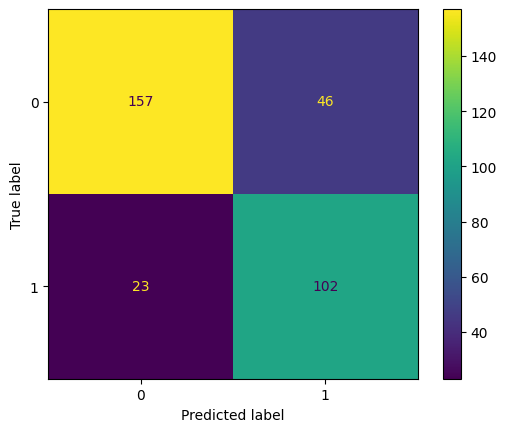

In [136]:
cm = confusion_matrix(y_test.astype(int), y_pred[:,1] > 0.5)
cm_display = ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_test.astype(int), y_pred[:,1] > 0.5))

# More EDA

<Axes: ylabel='Frequency'>

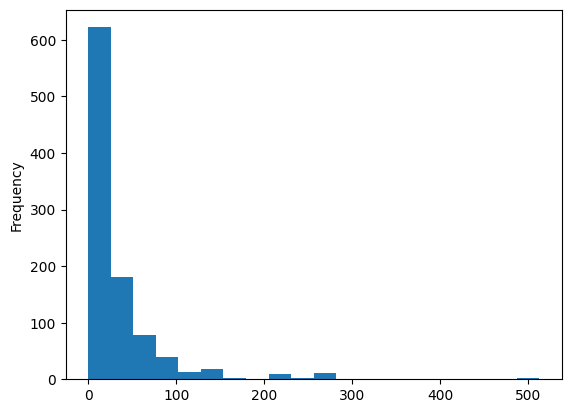

In [45]:
X_train.fare.plot.hist(bins=20)

In [46]:
X_train['fare_log10'] = np.log10(X_train.fare + 1)

<Axes: ylabel='Frequency'>

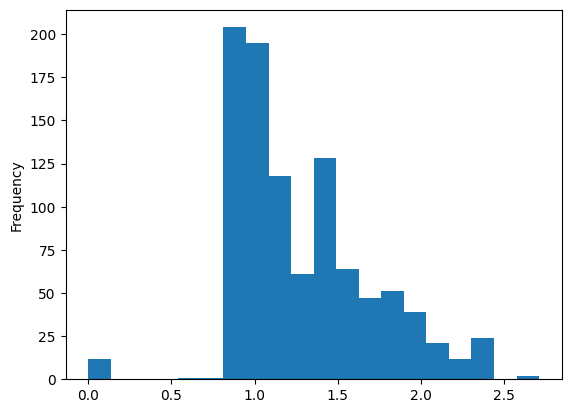

In [47]:
X_train.fare_log10.plot.hist(bins=20)

<Axes: xlabel='fare_log10', ylabel='Count'>

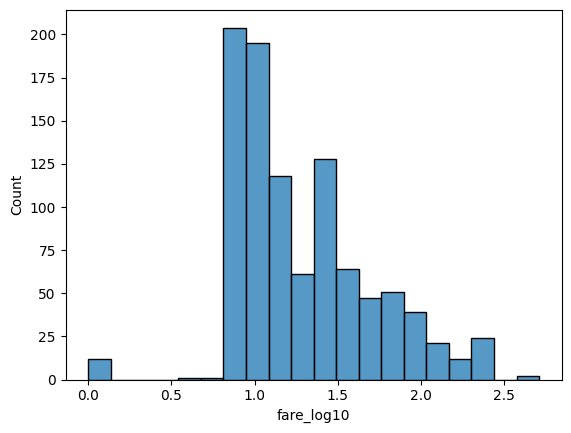

In [48]:
sns.histplot(data=X_train, x="fare_log10", bins=20)


<Axes: xlabel='fare', ylabel='Count'>

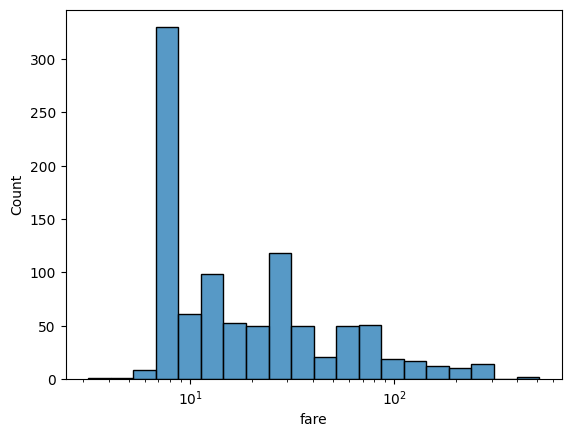

In [54]:
sns.histplot(data=X_train, x="fare", log_scale=True, bins=20)


In [55]:
train = pd.concat([X_train, y_train], axis=1)

In [56]:
train.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,fare_log10,survived
1216,3.0,"Smyth, Miss. Julia",female,NaN,0.0,0.0,335432,7.7333,NaN,Q,NaN,0.941178,1
819,3.0,"Glynn, Miss. Mary Agatha",female,NaN,0.0,0.0,335677,7.7500,NaN,Q,"Co Clare, Ireland Washington, DC",0.942008,1
1286,3.0,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0.0,0.0,2688,7.2292,NaN,C,NaN,0.915358,1
1280,3.0,"Vovk, Mr. Janko",male,22.0,0.0,0.0,349252,7.8958,NaN,S,NaN,0.949185,0
761,3.0,"de Pelsmaeker, Mr. Alfons",male,16.0,0.0,0.0,345778,9.5000,NaN,S,NaN,1.021189,0


<Axes: xlabel='fare', ylabel='Probability'>

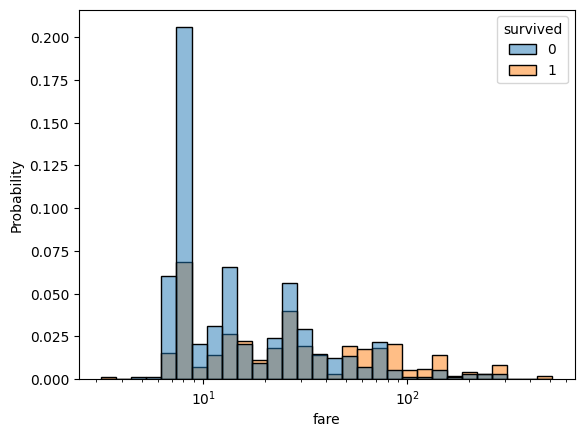

In [57]:
sns.histplot(train, x='fare', log_scale=True, stat='probability', bins=30, hue='survived')

<Axes: xlabel='age', ylabel='Probability'>

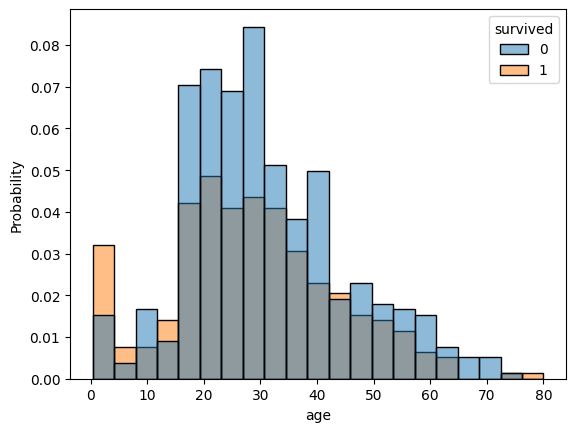

In [58]:
sns.histplot(train, x='age', stat='probability', hue='survived')

<Axes: ylabel='Frequency'>

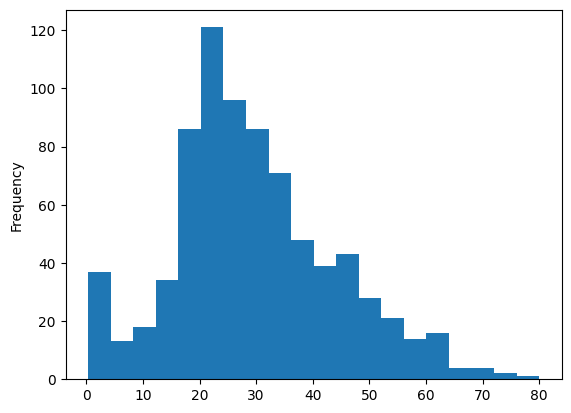

In [59]:
X_train['age'].plot.hist(bins=20)

<Axes: ylabel='Frequency'>

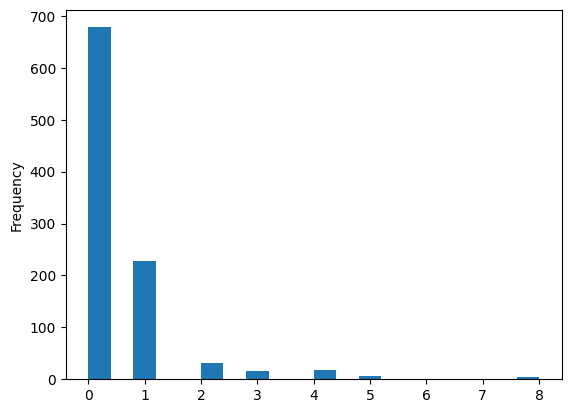

In [60]:
X_train['sibsp'].plot.hist(bins=20)

<Axes: ylabel='Frequency'>

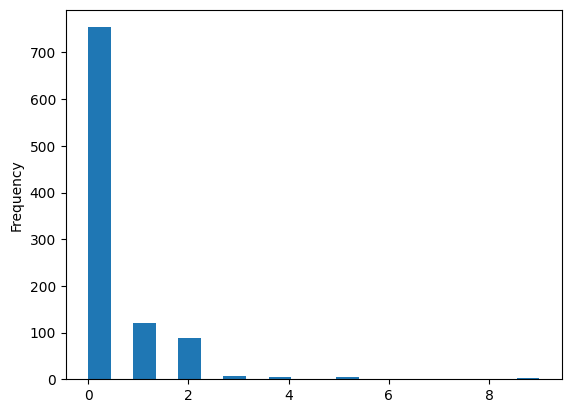

In [61]:
X_train['parch'].plot.hist(bins=20)

In [62]:
pd.crosstab(X_train.pclass, X_train.sex, dropna=False)

sex,female,male
pclass,,
1.0,104,136
2.0,78,129
3.0,163,371


In [63]:
# IMPUTATION - I could be smarter about imuting age as we have so many missing values - certainly imputing by sex / pclass 
pd.pivot_table(X_train, values=['age'], index=['sex', 'pclass', 'embarked'], aggfunc=[np.mean, "count"])

/tmp/ipykernel_6998/3832913021.py:2: FutureWarning: The provided callable <function mean at 0x7ff6d46d88b0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(X_train, values=['age'], index=['sex', 'pclass', 'embarked'], aggfunc=[np.mean, "count"])


mean count
                              age   age
sex    pclass embarked                 
female 1.0    C         37.122449    49
              Q         35.000000     2
              S         35.217391    46
       2.0    C         18.428571     7
              S         28.962010    68
       3.0    C         18.111111    18
              Q         24.794118    17
              S         23.303797    79
male   1.0    C         39.760417    48
              Q         44.000000     1
              S         41.426329    69
       2.0    C         25.700000    10
              Q         53.750000     4
              S         30.709524   105
       3.0    C         22.922841    27
              Q         27.533333    15
              S         26.249616   217
female 2.0    Q               NaN     0

In [64]:
pd.pivot_table(X_train, values=['age'], index=['sex', 'embarked'], aggfunc=[np.mean, "count"])

/tmp/ipykernel_6998/2047116750.py:1: FutureWarning: The provided callable <function mean at 0x7ff6d46d88b0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(X_train, values=['age'], index=['sex', 'embarked'], aggfunc=[np.mean, "count"])


mean count
                       age   age
sex    embarked                 
female C         30.729730    74
       Q         25.868421    19
       S         28.136874   193
male   C         32.757844    85
       Q         33.600000    20
       S         30.125533   391

In [65]:
pd.pivot_table(X_train, values=['age'], index=['sex', 'pclass'], aggfunc=[np.mean, "count"])

/tmp/ipykernel_6998/2671519079.py:1: FutureWarning: The provided callable <function mean at 0x7ff6d46d88b0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(X_train, values=['age'], index=['sex', 'pclass'], aggfunc=[np.mean, "count"])


mean count
                     age   age
sex    pclass                 
female 1.0     36.175258    97
       2.0     27.978889    75
       3.0     22.706140   114
male   1.0     40.770481   118
       2.0     31.063025   119
       3.0     25.977156   259

In [151]:
freqs = pd.crosstab(X_train.pclass, X_train.sex, dropna=False, normalize='index')
#freqs = pd.crosstab(X_train.pclass, X_train.sex, dropna=False)

In [152]:
freqs.columns

CategoricalIndex(['female', 'male'], categories=['female', 'male'], ordered=False, dtype='category', name='sex')

In [153]:
freqs

sex,female,male
pclass,,
1.0,0.433333,0.566667
2.0,0.376812,0.623188
3.0,0.305243,0.694757


In [154]:
freqs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 1.0 to 3.0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   female  3 non-null      float64
 1   male    3 non-null      float64
dtypes: float64(2)
memory usage: 72.0 bytes


In [155]:
freqs.index

Index([1.0, 2.0, 3.0], dtype='float64', name='pclass')

In [156]:
freqs2 = freqs.melt(ignore_index=False)

In [157]:
freqs2

,sex,value
pclass,,
1.0,female,0.433333
2.0,female,0.376812
3.0,female,0.305243
1.0,male,0.566667
2.0,male,0.623188
3.0,male,0.694757


In [158]:
freqs2

,sex,value
pclass,,
1.0,female,0.433333
2.0,female,0.376812
3.0,female,0.305243
1.0,male,0.566667
2.0,male,0.623188
3.0,male,0.694757


In [159]:
freqs2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 1.0 to 3.0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   sex     6 non-null      category
 1   value   6 non-null      float64 
dtypes: category(1), float64(1)
memory usage: 226.0 bytes


In [160]:
freqs2.reset_index()

,pclass,sex,value
0,1.0,female,0.433333
1,2.0,female,0.376812
2,3.0,female,0.305243
3,1.0,male,0.566667
4,2.0,male,0.623188
5,3.0,male,0.694757


<Axes: xlabel='pclass', ylabel='sex'>

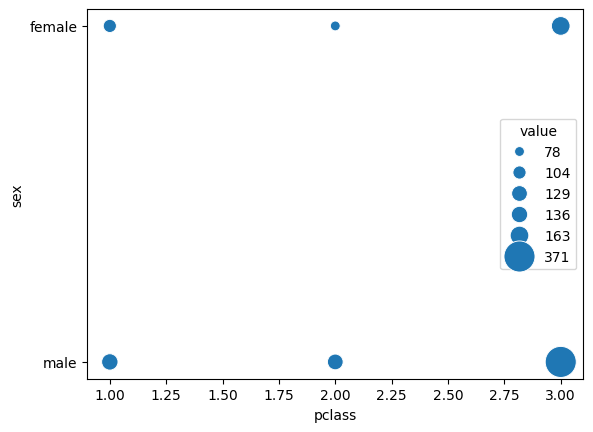

In [148]:
sns.scatterplot(freqs2, x='pclass', y='sex', size='value', sizes=(50,500))

<Axes: xlabel='pclass', ylabel='value'>

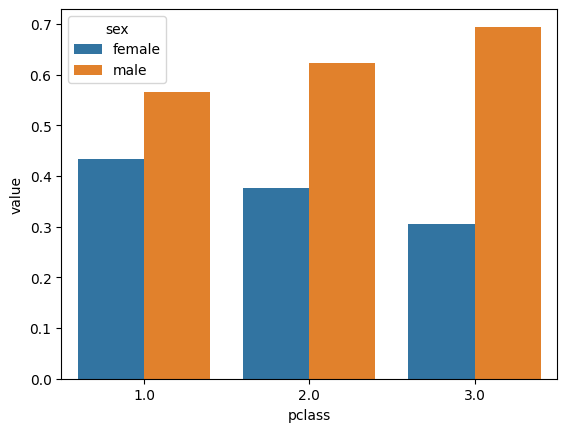

In [161]:
sns.barplot(freqs2, x='pclass', hue='sex', y='value')

In [69]:
freqs.reset_index()

sex,pclass,female,male
0,1.0,0.433333,0.566667
1,2.0,0.376812,0.623188
2,3.0,0.305243,0.694757


In [70]:
freqs['pclass'] = freqs.index

In [71]:
freqs.columns

Index(['female', 'male', 'pclass'], dtype='object', name='sex')

<Axes: xlabel='pclass'>

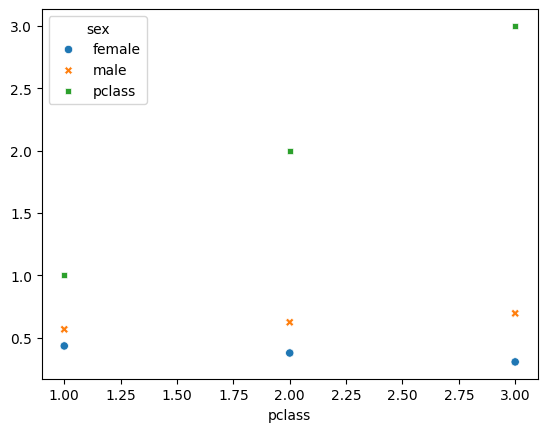

In [73]:
sns.scatterplot(freqs)

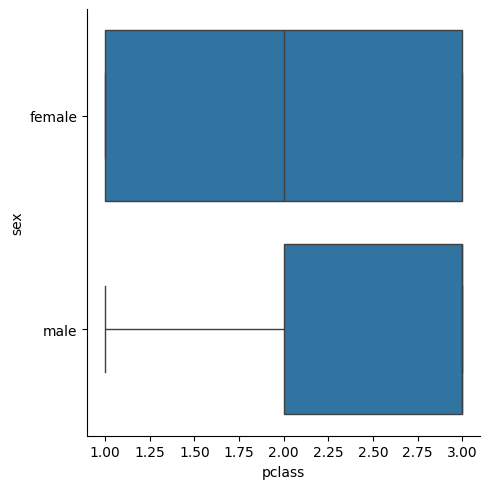

In [65]:
sns.catplot(data=X_train, x="pclass", y="sex", kind='box')

In [60]:
sns.scatterplot?

Signature:
sns.scatterplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    size=None,
    style=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    markers=True,
    style_order=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Draw a scatter plot with possibility of several semantic groupings.

The relationship between `x` and `y` can be shown for different subsets
of the data using the `hue`, `size`, and `style` parameters. These
parameters control what visual semantics are used to identify the different
subsets. It is possible to show up to three dimensions independently by
using all three semantic types, but this style of plot can be hard to
interpret and is often ineffective. Using redundant semantics (i.e. both
`hue` and `style` for the same variable) can be helpful for making
graphics more accessible.

See the :ref:`tutorial <relational_tutorial>` for more information.

The de

In [38]:
pd.crosstab?

Signature:
pd.crosstab(
    index,
    columns,
    values=None,
    rownames=None,
    colnames=None,
    aggfunc=None,
    margins: 'bool' = False,
    margins_name: 'Hashable' = 'All',
    dropna: 'bool' = True,
    normalize: 'bool' = False,
) -> 'DataFrame'
Docstring:
Compute a simple cross tabulation of two (or more) factors.

By default, computes a frequency table of the factors unless an
array of values and an aggregation function are passed.

Parameters
----------
index : array-like, Series, or list of arrays/Series
    Values to group by in the rows.
columns : array-like, Series, or list of arrays/Series
    Values to group by in the columns.
values : array-like, optional
    Array of values to aggregate according to the factors.
    Requires `aggfunc` be specified.
rownames : sequence, default None
    If passed, must match number of row arrays passed.
colnames : sequence, default None
    If passed, must match number of column arrays passed.
aggfunc : function, optional
   

In [37]:
X_train.sex.value_counts()

sex
male      619
female    362
Name: count, dtype: int64